In [1]:
import distutils
import distutils.util
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import os.path as opath
import ast
import json
from pandas.io.json import json_normalize
import datetime
import pickle
import re
from datetime import datetime
from IPython.core.display import HTML
from IPython.core.interactiveshell import InteractiveShell
import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
import math
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

<div class="span5 alert alert-info">
<h2>Note book details</h2>

<p> This notebook is for <b>data story</b> for <b>kickstarter success prediction</b> project.</p>

<p> Notes.</p>
<ol>
<li>  The file will utlize the pickle file crated in third part of for data wrangling</li> 
<li>  The file will perform exploratory analysis on the kickstarter data with some </li> 
<li>  The file will address the question with explanation  during analysis</li> 
<li>  The Questions analyzed are as follows: 
    <ul>
     <li>Question 1 : What is project count as per project status? What is successful and failed ratio ?</li>
     <li>Question 2 : Is there relationship with year,month of launch date for successful or Failed?</li>
     <li>Question 3 : Is there relationship with goal amount in success of failure of  project?</li>
     <li>Question 4 : Is there relationship with pledge amount in success of failure of  project?</li>
     <li>Question 5 : Is there relationship with pldege to goal ration in success of failure of  project?</li>
     <li>Question 6 : Is there relationship with pldege to no of backers ration in success of failure of  project?</li>
     <li>Question 7 : Is there relationship with no of backers in success of failure of  project?</li>
     <li>Question 8 : Which country are having most and least successful or failed project?</li>
     <li>Question 9 : Does staff pick maked more successful projects?</li>
	 <li>Question 10 : What categories are having most and least successful or failed project?</li>
     <li>Question 11 : What location type are having most and least successful or failed project?</li>
    </ul>
</li>        
</ol>
</div>

In [2]:
pd.set_option('display.max_colwidth', -1)
color_success='#00ff66'#kickstarter green#'#2BDE73'
color_fail='#FF192F'#'#FFC7CE'#'#FFC7CE'#'#FF0000' # red
'''graph_color_palette=[
    color_success, #kickstarter green#'#2BDE73'
    '#55ee99',# kickstarete light green
    'brown',
    'grey'
    ,color_fail # red
]
'''
stateSuccess='Successful'
stateFail='Failed'
# the statistical significance value is 5%
stat_significance =0.05

"graph_color_palette=[\n    color_success, #kickstarter green#'#2BDE73'\n    '#55ee99',# kickstarete light green\n    'brown',\n    'grey'\n    ,color_fail # red\n]\n"

In [3]:
# from IPython.core.display import HTML
css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
cssAnalysis = '.analysis {background:#5bffc0; }'
HTML('<style>{} {}</style>'.format(css,cssAnalysis))
pickle_file='DataStory_Jan2017_Jan2018.sa'
df_final_months = pickle.load( open( pickle_file, "rb" ) )
#df_final_months.info()
#df_final_months.head()

In [4]:
# filter out suspened, cancleed and live projects
df_fail_success= df_final_months[(df_final_months.state==stateSuccess) | (df_final_months.state==stateFail)]
_=df_fail_success.set_index('project_id')
#df_fail_success.head()

<div class="span5 alert alert-info analysis" >
<h4>
Conclusion : What is project count as per project status? What is successful and failed ratio ?</h4>
    <ul>
     <li> Most project belongs to Success and Failed Status. The status Canceled and Suspended are negligible </li> 
     <li> The status Live is for status still active and should be filtered  </li> 
     <li> There are more Failed then Successful projects but have very close numbers </li> 
    </ul>
</div>

In [5]:
def SampleMean(col):
    mean=df_fail_success[col].mean()
    print('The sample mean is '+str(mean))
    return mean

In [6]:
def StandardDeviation(col):
    sd=df_fail_success[col].std()
    print('The sample standard deviation is '+ str(sd))
    return sd

In [7]:
def CorrelationCofficent(colx,coly):
    corre_coff,p_value =stats.pearsonr(df_fail_success[colx],df_fail_success[coly])
    print('The CorrelationCofficent is {} and p value is {}'.format(corre_coff,p_value))
    return (corre_coff,p_value)

In [8]:
def CalculateZscore(col,expected_mean):
    length=len(df_fail_success)
    z_score = (SampleMean(col)-expected_mean)/(StandardDeviation(col)/math.sqrt(length))
    print('The z score for sample mean is {}'.format(z_score))
    return z_score

In [9]:
def CalculateZstat(colx,coly):
    zstat, pvalue = wstats.ztest(df_fail_success[colx],df_fail_success[coly], alternative='two-sided',
                    value=0, usevar='pooled', ddof=1.0)
    print ('The z stat is '+str(zstat)+ ' and p value is ' +str(pvalue))

In [10]:
collist=[
#'project_id',              
#'name',
#'userid',
#'exchange_rate',
#'state',
#'state_changed_at', 
#'spotlight',        
#'goal',
#'pledged',                 
####
#'created_at',
#'deadline',
#'launched_at',
#######
#'country',
#location_type',
#'category',             
#staff_pick',
'backers_count',
'usd_pledged',
'usd_goal',
'pledge_count_ratio',
'pledge_goal_ratio',
'pledge_extra_goal_ratio',
'deadline_days',
'state_change_days']    
    

In [91]:
for col in collist:#[::-1]:
    print(col)
    SampleMean(col)
    StandardDeviation(col)
    CalculateZscore('backers_count',12)

backers_count
The sample mean is 146.58372796257203


146.58372796257203

The sample standard deviation is 1279.596989288646


1279.596989288646

The sample mean is 146.58372796257203
The sample standard deviation is 1279.596989288646
The z score for sample mean is 41.77287751205059


41.77287751205059

usd_pledged
The sample mean is 12382.810713403365


12382.810713403365

The sample standard deviation is 121908.93520249204


121908.93520249204

The sample mean is 146.58372796257203
The sample standard deviation is 1279.596989288646
The z score for sample mean is 41.77287751205059


41.77287751205059

usd_goal
The sample mean is 41928.73335935933


41928.73335935933

The sample standard deviation is 1031763.6689745891


1031763.6689745891

The sample mean is 146.58372796257203
The sample standard deviation is 1279.596989288646
The z score for sample mean is 41.77287751205059


41.77287751205059

pledge_count_ratio
The sample mean is 67.92640673754087


67.92640673754087

The sample standard deviation is 132.43452406386024


132.43452406386024

The sample mean is 146.58372796257203
The sample standard deviation is 1279.596989288646
The z score for sample mean is 41.77287751205059


41.77287751205059

pledge_goal_ratio
The sample mean is 3.799182233125939


3.799182233125939

The sample standard deviation is 247.0830212979435


247.0830212979435

The sample mean is 146.58372796257203
The sample standard deviation is 1279.596989288646
The z score for sample mean is 41.77287751205059


41.77287751205059

pledge_extra_goal_ratio
The sample mean is -inf


-inf

The sample standard deviation is nan


nan

The sample mean is 146.58372796257203
The sample standard deviation is 1279.596989288646
The z score for sample mean is 41.77287751205059


41.77287751205059

deadline_days
The sample mean is 33.41615792776859


33.41615792776859

The sample standard deviation is 12.285570467129684


12.285570467129684

The sample mean is 146.58372796257203
The sample standard deviation is 1279.596989288646
The z score for sample mean is 41.77287751205059


41.77287751205059

state_change_days
The sample mean is 33.418471818083844


33.418471818083844

The sample standard deviation is 12.312039112771824


12.312039112771824

The sample mean is 146.58372796257203
The sample standard deviation is 1279.596989288646
The z score for sample mean is 41.77287751205059


41.77287751205059

In [92]:
CorrelationCofficent('backers_count','usd_goal')

The CorrelationCofficent is 0.00896336096682437 and p value is 0.0003708406908850167


(0.0089633609668243706, 0.00037084069088501672)

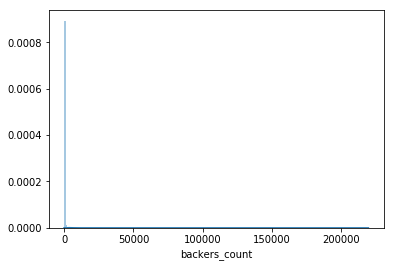

In [93]:
#check by plotting the graph
sns.distplot(df_fail_success.backers_count,bins=200)

In [ ]:
stats.pearsonr(df_final_months.backers_count,df_final_months.usd_goal)

In [80]:
#df=df_fail_success.loc[:130,['state','backers_count']]
#df = pd.read_csv('../human_temp_assignment/data/human_body_temperature.csv')
#sns.pairplot(df, hue='gender',palette =('blue','#DE3163'))
#df
#sns.pairplot(df, hue='state',palette =('blue','#DE3163'))

In [74]:
df.head()

,state,backers_count
0,Successful,12
1,Successful,40
2,Successful,57
3,Successful,114
4,Successful,31


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157743 entries, 0 to 172876
Data columns (total 2 columns):
state            157743 non-null object
backers_count    157743 non-null int64
dtypes: int64(1), object(1)
memory usage: 8.6+ MB


In [19]:
# check if the col has normal distribution
def CalculateNormalTest(col):
    #return df_final_months.loc[: ,[col]].describe()
    #eturn df_final_months[col].describe()
    # to test normal distibution , in step 1, scipy normaltest function
    rhi_value,p_value=stats.normaltest(df_final_months[col])
    return (rhi_value,p_value)

In [20]:
rhi_value,p_value=stats.normaltest(df_final_months.backers_count)
print (rhi_value)
print(p_value)

621981.31871
0.0


In [67]:
#help(stats.normaltest)
#help(stats.pearsonr)
help(wstats.ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1, x2 : array_like, 1-D or 2-D
        two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : string
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means larger than value
           'smaller' :  H1: difference in means smaller than value
 

In [ ]:
# rough
for col in collist:#[::-1]:
    print(col)
    chi_value,p_value=CalculateNormalTest(col)
    print('Chi value: '+ str(chi_value))
    print('P value: '+ str(p_value))

    if (p_value>stat_significance):
        print('This distribution seems to be normal distribution')
    else:
        print('This distribution is not a normal distribution')